<a href="https://colab.research.google.com/github/fridaruh/customer_churn_pred/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerías

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Carga de datos

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fridaruh/customer_churn_pred/master/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Revisión de valores nulos

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Excluímos columnas que no aportan información al modelo:

In [5]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis (EDA)

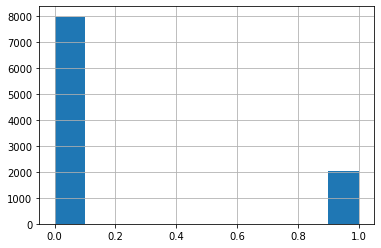

In [7]:
df['Exited'].hist()

Aproximadamente el **20%** de los clientes han "churneado". Entonces, el modelo de línea de base podría ser predecir que el 20% de los clientes abandonará. Dado que el 20% es un número pequeño, debemos asegurarnos de que el modelo elegido prediga con gran precisión este 20%, ya que es de interés para el banco identificar y mantener este grupo en lugar de predecir con precisión los clientes retenidos.

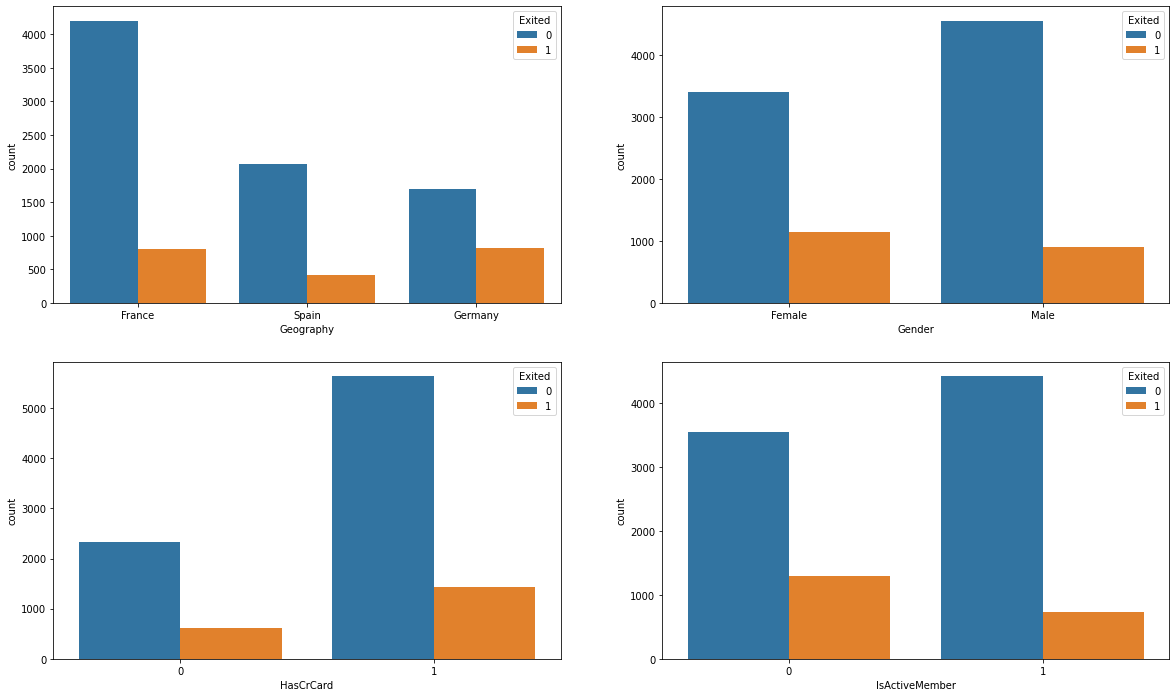

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

Observamos lo siguiente:





*   La mayoría de los datos son de personas de Francia. Sin embargo, la proporción de clientes abandonados está inversamente relacionada con la población de clientes aludiendo a que el banco posiblemente tenga un problema (tal vez no haya asignados suficientes recursos de atención al cliente) en las áreas donde tiene menos clientes.
*   La proporción de clientes femeninos que se van también es mayor que la de los clientes masculinos.
*   Curiosamente, la mayoría de los clientes que se agitaron son aquellos con tarjetas de crédito. Dado que la mayoría de los clientes tienen tarjetas de crédito, se podría demostrar que esto es solo una coincidencia.
*   Como era de esperar, los miembros inactivos tienen una mayor rotación. Lo preocupante es que la proporción total de miembros inactivos es bastante alta, lo que sugiere que el banco puede necesitar implementar un programa para convertir a este grupo en clientes activos, ya que esto definitivamente tendrá un impacto positivo en la rotación de clientes.



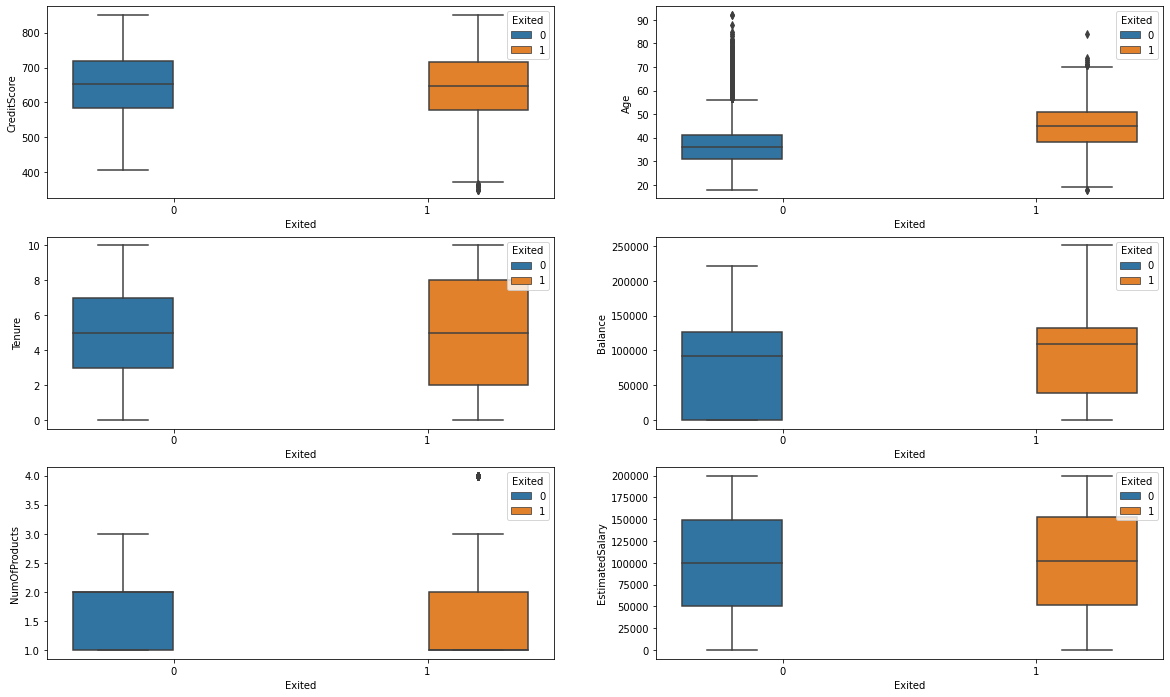

In [10]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

Observamos lo siguiente:

- No hay una diferencia significativa en la distribución del puntaje crediticio entre los clientes retenidos y los que se retiran.
- Los clientes de mayor edad se están yendo en mayor proporción que los más jóvenes aludiendo a una diferencia en la preferencia de servicio en las categorías de edad. Es posible que el banco deba revisar su mercado objetivo o revisar la estrategia de retención entre los diferentes grupos de edad.
- Con respecto a la tenencia, los clientes en cualquiera de los extremos (pasaron poco tiempo con el banco o mucho tiempo con el banco) tienen más probabilidades de abandonar en comparación con los que tienen una antigüedad promedio.
- Es preocupante que el banco esté perdiendo clientes con saldos bancarios importantes que probablemente afectarán su capital disponible para préstamos.
- Ni el producto ni el salario tienen un efecto significativo sobre la probabilidad de abandono.

# Feature engineering

Train, test split

In [11]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Por último, introducimos una variable para capturar el puntaje crediticio dada la edad para tener en cuenta el comportamiento crediticio en la vida adulta:

In [22]:
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

In [23]:
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1

In [12]:
Y = df['Exited']

In [24]:
X = df.drop(['Exited'], axis=1)

In [25]:
X = pd.get_dummies(X, columns=['Geography','Gender'])

In [26]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

# Modelado

In [34]:
import xgboost as xgb

In [29]:
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [37]:
%%time

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.06, objective= 'binary:logistic', n_jobs=-1).fit(X_train,Y_train)

CPU times: user 1.42 s, sys: 24 ms, total: 1.45 s
Wall time: 854 ms


In [38]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, Y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], Y_test)))

Accuracy of XGB classifier on training set: 0.88
Accuracy of XGB classifier on test set: 0.87


In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
Y_pred = xgb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1577
           1       0.82      0.51      0.62       423

    accuracy                           0.87      2000
   macro avg       0.85      0.74      0.77      2000
weighted avg       0.87      0.87      0.86      2000



In [48]:
!pip install scikit-plot

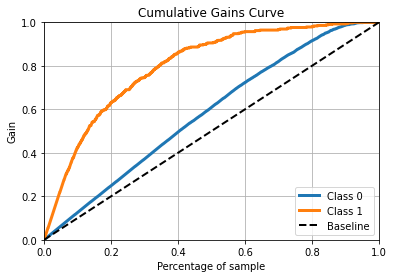

In [46]:
import scikitplot as skplt
predict_probas = xgb_model.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(Y_test, predict_probas)
plt.show();

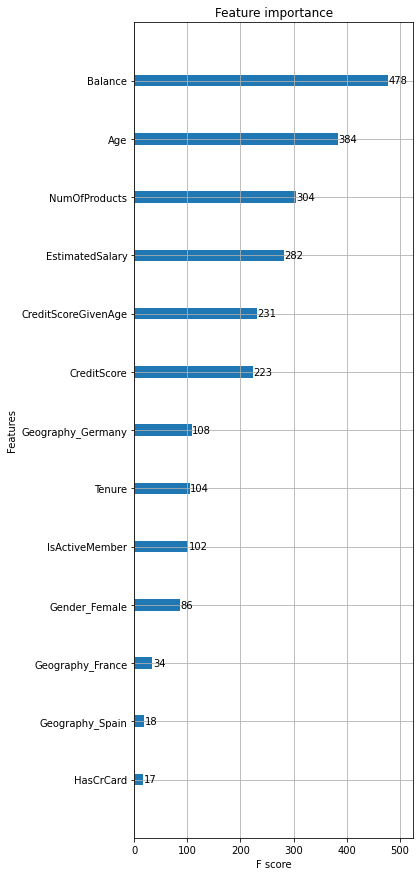

In [42]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(5,15))
plot_importance(xgb_model, ax=ax);